In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd


In [2]:
PROJECT_ROOT = Path(os.getcwd()).parent
DATA_DIR = PROJECT_ROOT / "data"
DATASET_DIR = PROJECT_ROOT / "data" / "BIM Dataset V3" / "video"

## Inspecting the number of videos per gloss

In [3]:
assert DATASET_DIR.exists(), f"{DATASET_DIR} does not exist"

rows = []

for gloss_dir in DATASET_DIR.iterdir():
    if not gloss_dir.is_dir():
        continue

    video_count = len(list(gloss_dir.glob("*.mp4")))
    rows.append({"gloss": gloss_dir.name, "num_videos": video_count})

df = pd.DataFrame(rows)
df

,gloss,num_videos
0,abang,72
1,ada,21
2,ambil,15
3,anak_lelaki,108
4,anak_perempuan,72
...,...,...
85,tanya,27
86,teh_tarik,27
87,teksi,18
88,tidur,18


## Take top 30 glosses with most videos

In [4]:
df_top30 = df.sort_values("num_videos", ascending=False).head(30).reset_index(drop=True)

df_top30

,gloss,num_videos
0,hi,398
1,beli,138
2,pukul,132
3,nasi_lemak,121
4,lemak,120
5,kereta,119
6,nasi,118
7,marah,115
8,anak_lelaki,108
9,baik,105


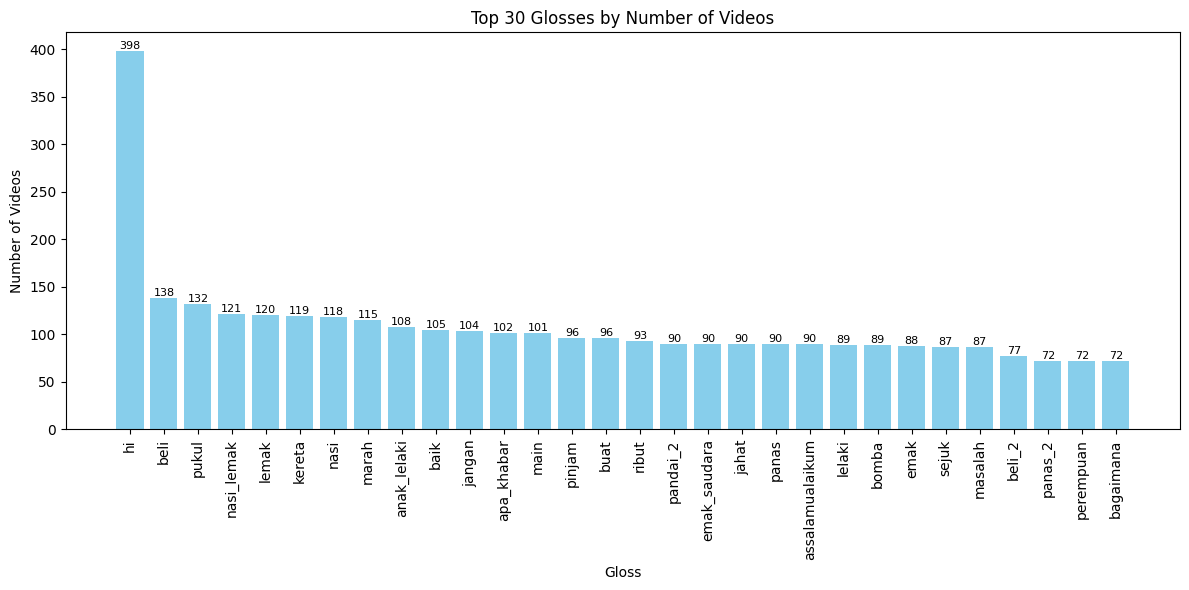

In [5]:
# Plot bar chart of top 30 glosses (put number above bars)
plt.figure(figsize=(12, 6))
bars = plt.bar(df_top30["gloss"], df_top30["num_videos"], color="skyblue")

plt.xticks(rotation=90)
plt.xlabel("Gloss")
plt.ylabel("Number of Videos")
plt.title("Top 30 Glosses by Number of Videos")

# ---- add value labels on top of bars ----
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=8,
    )

plt.tight_layout()
plt.show()

In [6]:
top30_glosses = df_top30["gloss"].tolist()
top30_glosses

['hi',
 'beli',
 'pukul',
 'nasi_lemak',
 'lemak',
 'kereta',
 'nasi',
 'marah',
 'anak_lelaki',
 'baik',
 'jangan',
 'apa_khabar',
 'main',
 'pinjam',
 'buat',
 'ribut',
 'pandai_2',
 'emak_saudara',
 'jahat',
 'panas',
 'assalamualaikum',
 'lelaki',
 'bomba',
 'emak',
 'sejuk',
 'masalah',
 'beli_2',
 'panas_2',
 'perempuan',
 'bagaimana']

In [7]:
output_path = DATA_DIR / "top30_glosses.txt"
with open(output_path, "w") as f:
    f.write(" ".join(top30_glosses))
